In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Data Collection
# Load the air quality data into a Pandas DataFrame
data = pd.read_csv("/content/cpcb_dly_aq_tamil_nadu-2014.csv")

In [3]:
data.head()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,38,01-02-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,11.0,17.0,55.0,NaN
1,38,01-07-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,17.0,45.0,NaN
2,38,21-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,12.0,18.0,50.0,NaN
3,38,23-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,15.0,16.0,46.0,NaN
4,38,28-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,14.0,42.0,NaN


In [4]:
data.isnull().sum()

Stn Code                             0
Sampling Date                        0
State                                0
City/Town/Village/Area               0
Location of Monitoring Station       0
Agency                               0
Type of Location                     0
SO2                                 11
NO2                                 13
RSPM/PM10                            4
PM 2.5                            2879
dtype: int64

In [7]:
data.fillna(value=data['SO2'].mean(), inplace=True)

data.fillna(value=data['NO2'].mean(), inplace=True)

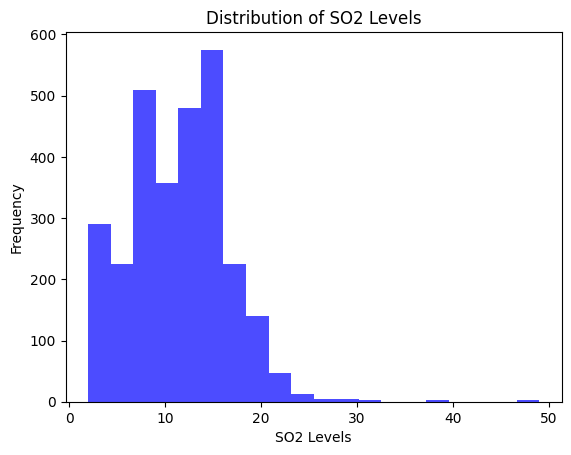

In [8]:
plt.hist(data['SO2'], bins=20, color='blue', alpha=0.7)
plt.xlabel('SO2 Levels')
plt.ylabel('Frequency')
plt.title('Distribution of SO2 Levels')
plt.show()

In [10]:
data['Sampling Date'] = pd.to_datetime(data['Sampling Date'])
data['Month'] = data['Sampling Date'].dt.month
monthly_avg = data.groupby('Month')['RSPM/PM10'].mean()

In [11]:
X = data[['SO2', 'NO2']]
y = data['RSPM/PM10']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Model Evaluation
# Evaluate the model's performance
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 854.5655067453894
R-squared: 0.1791033971217928


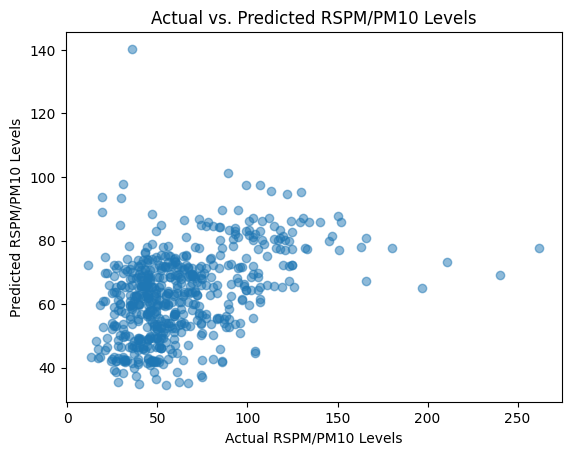

In [14]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual RSPM/PM10 Levels')
plt.ylabel('Predicted RSPM/PM10 Levels')
plt.title('Actual vs. Predicted RSPM/PM10 Levels')
plt.show()
